In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv('alz.csv')
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [ ]:
df["Age"].value_counts()

<Axes: >

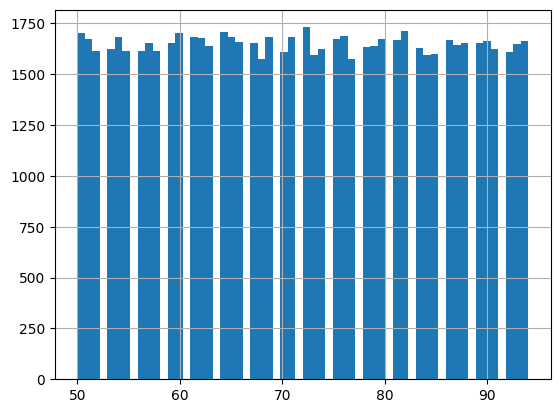

In [12]:
df["Age"].hist(bins=60)

In [2]:
def grab_cols(df):
    num_cols = list(df.select_dtypes(include="number"))
    cat_cols = [col for col in df.columns if col not in num_cols]
    num_but_cat = [col for col in num_cols if df[col].nunique()<25]
    cat_but_car = [col for col in cat_cols if df[col].nunique() >25]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    print(f"cat_cols = {cat_cols}")
    print(f"num_cols = {num_cols}")
    print(f"num_but_cat = {num_but_cat}")
    print(f"cat_but_car= {cat_but_car}")
    return cat_cols,num_cols,cat_but_car,num_but_cat
cat_cols,num_cols,cat_but_car,num_but_cat = grab_cols(df)

cat_cols = ['Country', 'Gender', 'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption', 'Diabetes', 'Hypertension', 'Cholesterol Level', 'Family History of Alzheimer’s', 'Depression Level', 'Sleep Quality', 'Dietary Habits', 'Air Pollution Exposure', 'Employment Status', 'Marital Status', 'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level', 'Income Level', 'Stress Levels', 'Urban vs Rural Living', 'Alzheimer’s Diagnosis', 'Education Level']
num_cols = ['Age', 'BMI', 'Cognitive Test Score']
num_but_cat = ['Education Level']
cat_but_car= []


In [3]:
df["Cholesterol Level"] = df["Cholesterol Level"].map({"Normal": 0, "High": 1})

In [4]:
binary_cols = ['Gender',
 'Diabetes',
 'Hypertension',
 'Family History of Alzheimer’s',
 'Genetic Risk Factor (APOE-ε4 allele)',
 'Urban vs Rural Living',
 'Alzheimer’s Diagnosis']
from sklearn.preprocessing import LabelEncoder

def label_encoder(df, col):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"Column: {col} -> {mapping}")
    

for c in binary_cols:
    label_encoder(df, c)

Column: Gender -> {'Female': 0, 'Male': 1}
Column: Diabetes -> {'No': 0, 'Yes': 1}
Column: Hypertension -> {'No': 0, 'Yes': 1}
Column: Family History of Alzheimer’s -> {'No': 0, 'Yes': 1}
Column: Genetic Risk Factor (APOE-ε4 allele) -> {'No': 0, 'Yes': 1}
Column: Urban vs Rural Living -> {'Rural': 0, 'Urban': 1}
Column: Alzheimer’s Diagnosis -> {'No': 0, 'Yes': 1}


In [5]:
ordinal_cols = [
 'Physical Activity Level',
 'Depression Level',
 'Sleep Quality',
 'Dietary Habits',
 'Air Pollution Exposure',
 'Social Engagement Level',
 'Income Level',
 'Stress Levels']

df['Physical Activity Level'] = df['Physical Activity Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Depression Level'] = df['Depression Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Sleep Quality'] = df['Sleep Quality'].map({'Poor': 0, 'Average': 1, 'Good': 2})
df['Dietary Habits'] = df['Dietary Habits'].map({'Unhealthy': 0, 'Average': 1, 'Healthy': 2})
df['Air Pollution Exposure'] = df['Air Pollution Exposure'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Social Engagement Level'] = df['Social Engagement Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Income Level'] = df['Income Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Stress Levels'] = df['Stress Levels'].map({'Low': 0, 'Medium': 1, 'High': 2})

In [6]:
ohe_cols = ['Country',
 'Smoking Status',
 'Alcohol Consumption',
 'Employment Status',
 'Marital Status']

def ohe(dataframe,ohe_cols):
    dataframe = pd.get_dummies(dataframe,columns=ohe_cols,drop_first=False,dtype=int)
    return dataframe

df= ohe(df,ohe_cols)

X = df.drop(columns='Alzheimer’s Diagnosis')
y = df['Alzheimer’s Diagnosis']

In [7]:
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
ctb = CatBoostClassifier(n_estimators=500,verbose=False,depth=5)
cross_val_score(ctb,X,y,cv=20,scoring="accuracy",n_jobs=-1).mean()

0.7246610801514187

In [8]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=500,max_depth=5)
cross_val_score(xgb,X,y,cv=20,scoring="accuracy",n_jobs=-1).mean()

0.7075776897425696

In [12]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score

# Stratified K-Fold oluşturma (sınıf dağılımını korur)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Metrikleri saklamak için boş listeler
accuracies = []
recalls = []
roc_aucs = []

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # scale_pos_weight hesaplama
    ratio = float(y_train.loc[y_train == 0].shape[0]) / y_train.loc[y_train == 1].shape[0]

    clf = xgb.XGBClassifier(scale_pos_weight=ratio, n_estimators=300, max_depth=5)

    # Modeli eğit
    clf.fit(X_train, y_train)

    # Test verisi üzerinde tahmin yap
    predictions = clf.predict(X_test)
    probas = clf.predict_proba(X_test)[:,1]

    # Metrikleri hesapla
    acc = accuracy_score(y_test, predictions)
    rec = recall_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, probas)

    accuracies.append(acc)
    recalls.append(rec)
    roc_aucs.append(roc_auc)

    print(f"Accuracy: {acc:.4f}, Recall: {rec:.4f}, ROC AUC: {roc_auc:.4f}, ratio: {ratio:.4f}")

# Ortalama metrik değerlerini yazdırma
print("\nAverage Metrics:")
print(f"Accuracy: {sum(accuracies)/len(accuracies):.4f}")
print(f"Recall: {sum(recalls)/len(recalls):.4f}")
print(f"ROC AUC: {sum(roc_aucs)/len(roc_aucs):.4f}")

Accuracy: 0.7095, Recall: 0.7184, ROC AUC: 0.7835, ratio: 1.4187
Accuracy: 0.7063, Recall: 0.7298, ROC AUC: 0.7864, ratio: 1.4187
Accuracy: 0.6961, Recall: 0.7135, ROC AUC: 0.7772, ratio: 1.4187
Accuracy: 0.7060, Recall: 0.7268, ROC AUC: 0.7765, ratio: 1.4186
Accuracy: 0.7095, Recall: 0.7294, ROC AUC: 0.7821, ratio: 1.4186
Accuracy: 0.7103, Recall: 0.7291, ROC AUC: 0.7903, ratio: 1.4186
Accuracy: 0.7095, Recall: 0.7314, ROC AUC: 0.7836, ratio: 1.4186
Accuracy: 0.7015, Recall: 0.7255, ROC AUC: 0.7833, ratio: 1.4186
Accuracy: 0.7107, Recall: 0.7239, ROC AUC: 0.7845, ratio: 1.4186
Accuracy: 0.7209, Recall: 0.7388, ROC AUC: 0.7922, ratio: 1.4186

Average Metrics:
Accuracy: 0.7080
Recall: 0.7267
ROC AUC: 0.7840


In [13]:
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score

# Stratified K-Fold oluşturma (sınıf dağılımını korur)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Metrikleri saklamak için boş listeler
accuracies = []
recalls = []
roc_aucs = []

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # class_weights için ratio hesaplama
    negative_count = (y_train == 0).sum()
    positive_count = (y_train == 1).sum()
    
    ratio = float(negative_count) / float(positive_count)
    
    # CatBoostClassifier tanımlama
    # class_weights -> ör. [1, ratio] şeklinde atayıp 
    # minority sınıfa (1) daha fazla ağırlık veriyoruz
    clf = CatBoostClassifier(
        class_weights=[1, ratio],
        iterations=300,
        depth=5,
        random_seed=42,
        # verbose=False diyerek eğitim çıktısını kapatabilirsiniz
        # eğer öğrenme süreci ekran çıktısı istemiyorsanız
        verbose=False
    )
    
    # Modeli eğit
    clf.fit(X_train, y_train)
    
    # Test verisi üzerinde tahmin yap
    predictions = clf.predict(X_test)
    probas = clf.predict_proba(X_test)[:, 1]
    
    # Metrikleri hesapla
    acc = accuracy_score(y_test, predictions)
    rec = recall_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, probas)
    
    accuracies.append(acc)
    recalls.append(rec)
    roc_aucs.append(roc_auc)
    
    print(f"Accuracy: {acc:.4f}, Recall: {rec:.4f}, "
          f"ROC AUC: {roc_auc:.4f}, ratio: {ratio:.4f}")

# Ortalama metrik değerlerini yazdırma
print("\nAverage Metrics:")
print(f"Accuracy: {sum(accuracies)/len(accuracies):.4f}")
print(f"Recall: {sum(recalls)/len(recalls):.4f}")
print(f"ROC AUC: {sum(roc_aucs)/len(roc_aucs):.4f}")

Accuracy: 0.7176, Recall: 0.7617, ROC AUC: 0.7993, ratio: 1.4187
Accuracy: 0.7175, Recall: 0.7751, ROC AUC: 0.8011, ratio: 1.4187
Accuracy: 0.7164, Recall: 0.7663, ROC AUC: 0.7964, ratio: 1.4187
Accuracy: 0.7132, Recall: 0.7662, ROC AUC: 0.7932, ratio: 1.4186
Accuracy: 0.7200, Recall: 0.7698, ROC AUC: 0.8001, ratio: 1.4186
Accuracy: 0.7237, Recall: 0.7760, ROC AUC: 0.8039, ratio: 1.4186
Accuracy: 0.7211, Recall: 0.7682, ROC AUC: 0.7970, ratio: 1.4186
Accuracy: 0.7163, Recall: 0.7698, ROC AUC: 0.7997, ratio: 1.4186
Accuracy: 0.7208, Recall: 0.7587, ROC AUC: 0.7998, ratio: 1.4186
Accuracy: 0.7290, Recall: 0.7727, ROC AUC: 0.8087, ratio: 1.4186

Average Metrics:
Accuracy: 0.7196
Recall: 0.7684
ROC AUC: 0.7999
